# Model 2 - Projeto1 - Skin_Cancer

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
import keras
from keras.applications import VGG19,Xception,VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras import layers
import tensorflow as tf


## Dataset de Treino

In [27]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)

train_data = train_datagen.flow_from_directory(
    '../input/skin-cancer-malignant-vs-benign/train',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

Found 2637 images belonging to 2 classes.


## DataSet de Teste

In [28]:
test_datagen =  ImageDataGenerator(rescale=1/255)
test_data =   test_datagen.flow_from_directory(
    '../input/skin-cancer-malignant-vs-benign/test',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)



Found 660 images belonging to 2 classes.


## Criando Lista com 2 Classes

In [29]:
class_names = ["Benign","Malignant"]
for i in class_names :
    print(class_names.index(i),"  ",i)

0    Benign
1    Malignant


## Visualizando Dados de Teste

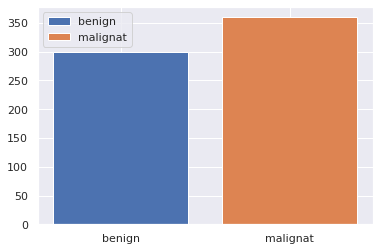

In [30]:
fig, ax = plt.subplots()
ax.bar(["benign"],[300],label='benign')
ax.bar(["malignat"],[360],label ="malignat")
ax.legend()

benign


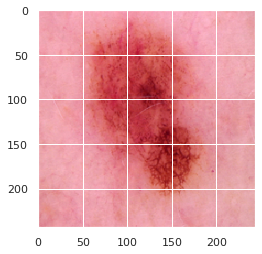

In [31]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1261.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("benign")
plt.imshow(new_img)

malignant


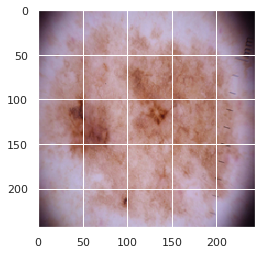

In [32]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/train/malignant/1021.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("malignant")
plt.imshow(new_img)

## Definindo a CNN (DropOut = 0.5 e activation = softmax)

In [62]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2, activation= 'softmax')
])

## Compilando o Modelo
### Stop quando não tiver melhoria em 20x seguida

In [63]:
#compile the model
import tensorflow as tf
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)

## Model Fit (Epochs = 50)

In [64]:
history=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
83/83 [==============================] - 10s 125ms/step - loss: 0.6439 - accuracy: 0.6318 - val_loss: 0.6741 - val_accuracy: 0.4818
Epoch 2/50
83/83 [==============================] - 10s 121ms/step - loss: 0.4976 - accuracy: 0.7471 - val_loss: 0.6451 - val_accuracy: 0.5273
Epoch 3/50
83/83 [==============================] - 11s 130ms/step - loss: 0.4580 - accuracy: 0.7766 - val_loss: 0.5788 - val_accuracy: 0.7364
Epoch 4/50
83/83 [==============================] - 10s 124ms/step - loss: 0.4436 - accuracy: 0.7914 - val_loss: 0.5022 - val_accuracy: 0.7879
Epoch 5/50
83/83 [==============================] - 10s 124ms/step - loss: 0.4186 - accuracy: 0.7937 - val_loss: 0.4698 - val_accuracy: 0.7924
Epoch 6/50
83/83 [==============================] - 11s 129ms/step - loss: 0.4279 - accuracy: 0.7911 - val_loss: 0.4157 - val_accuracy: 0.8136
Epoch 7/50
83/83 [==============================] - 10s 124ms/step - loss: 0.4152 - accuracy: 0.8009 - val_loss: 0.4375 - val_accuracy: 0.8152

## Previsão Geral: Loss e Accuracy

In [65]:
model.evaluate(test_data)

21/21 [==============================] - 1s 60ms/step - loss: 0.3713 - accuracy: 0.8182


[0.3713236153125763, 0.8181818127632141]

## Plot Treino

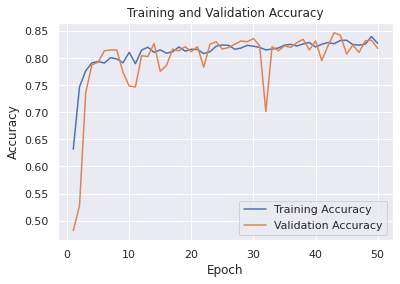

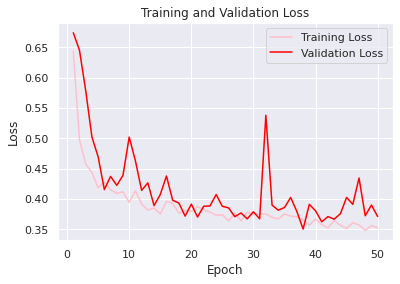

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc,  label='Training Accuracy')
plt.plot(epochs, val_acc,  label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Predict Dados de Validação

In [39]:
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

[1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1
 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1
 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0
 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 

In [40]:
y_pred.shape

(660,)

## Exemplos para testar o modelo com imagens verdadeiras.

### Imagem  Benigna Teste

[0]
Benign


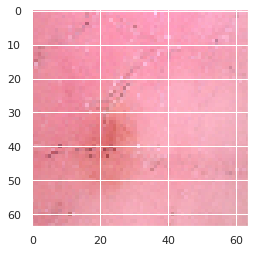

In [41]:
#example 1
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1006.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


### Imagem  Maligna Teste

[1]
Malignant


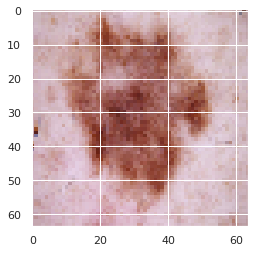

In [42]:
#example 2
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/malignant/1358.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)



### Imagem  Benigna Teste

[0]
Benign


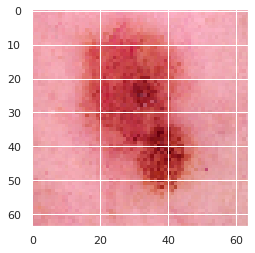

In [43]:
#example 3
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1261.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


### Imagem  Maligna Teste

[1]
Malignant


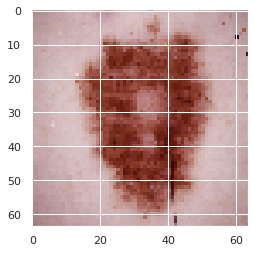

In [44]:
#example 4
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/malignant/1058.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


### Imagem Maligna Teste

[1]
Malignant


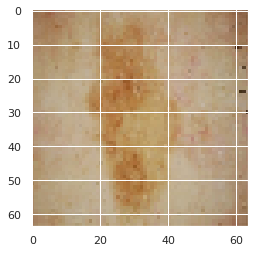

In [45]:
#example 5
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/malignant/161.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[0]
Benign


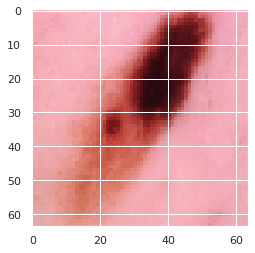

In [46]:
#example 6
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1415.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
Malignant


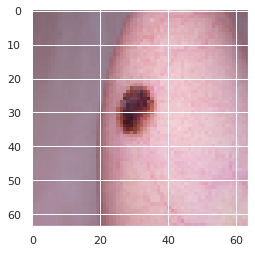

In [47]:
#example 7
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1208.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[0]
Benign


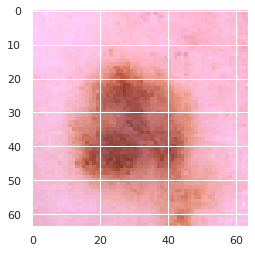

In [48]:
#example 8
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/10.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
Malignant


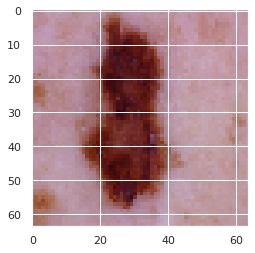

In [49]:
#example 9
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/malignant/1216.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
Malignant


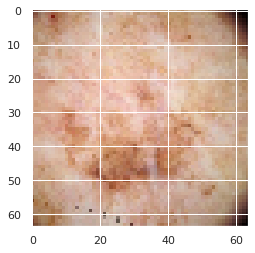

In [50]:
#example 10
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/malignant/1.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [25]:
#save file as h5 model
from keras.models import model_from_json
xception_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(xception_json)
# serialize weights to HDF5
model.save("model_skin2.h5") 
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model_ProjetoManchas.tflite', 'wb') as f:
  f.write(tflite_model)